In [76]:
!pip install seaborn

In [77]:
from __future__ import absolute_import,division,print_function
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.17.1


In [78]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [79]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [80]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [81]:
dataset=dataset.dropna()

In [82]:
origin=dataset.pop('Origin')

In [83]:
dataset['USA']=(origin==1)*1.0
dataset['Europe']=(origin==2)*1.0
dataset['Japan']=(origin==3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [84]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

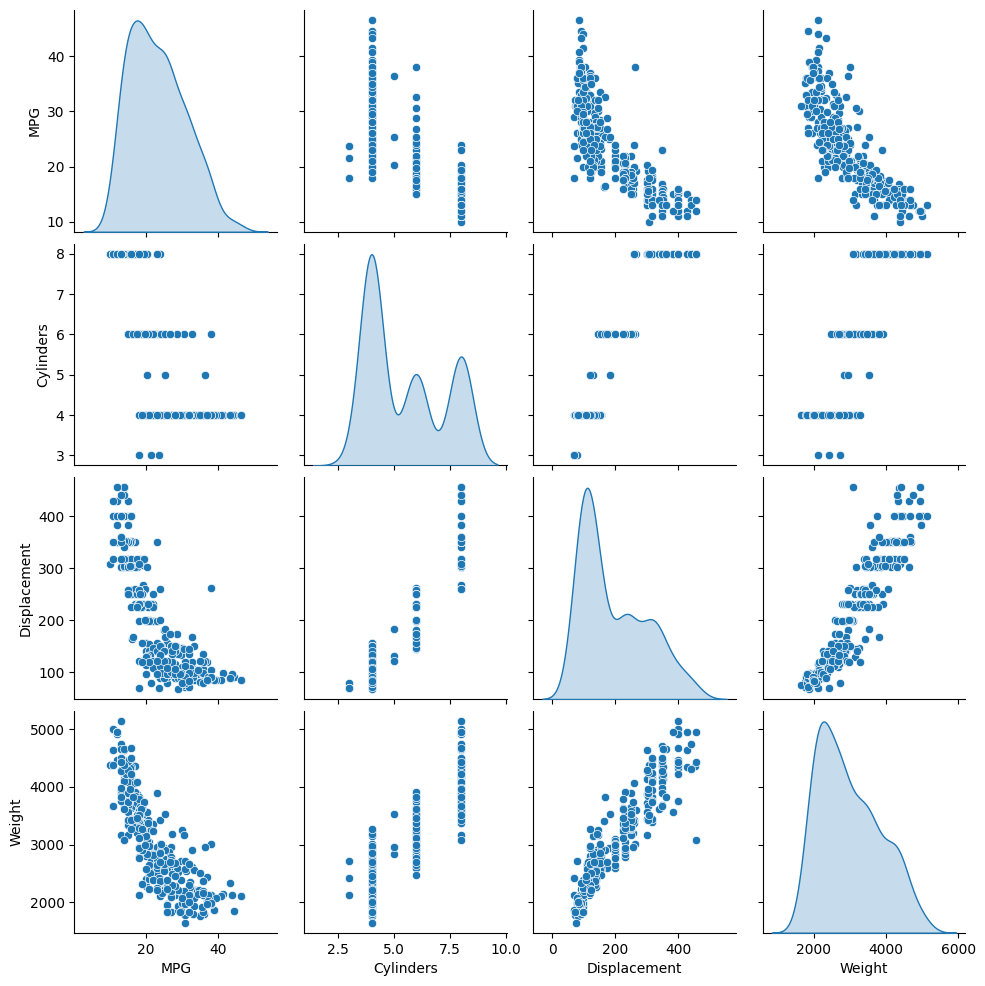

In [85]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]],diag_kind="kde")

In [86]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [87]:
train_labels=train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')

In [88]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

# **Sequential Model**

In [89]:
def build_model():
  model=keras.Sequential([layers.Dense(64,activation=tf.nn.relu,input_shape=[len(train_dataset.keys())]),layers.Dense(64,activation=tf.nn.relu),layers.Dense(1)])
  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_absolute_error','mean_squared_error'])
  return model

In [90]:
model=build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[-0.08574178],
       [ 0.22188324],
       [ 0.62448555],
       [ 0.211016  ],
       [ 0.23614237],
       [ 0.31858987],
       [ 0.32694656],
       [ 0.63493145],
       [ 0.13655156],
       [ 0.29675707]], dtype=float32)

In [93]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch%100==0:print('')
    print('.',end='')
EPOCHS=1000
history=model.fit(normed_train_data,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [94]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.861933,1.113595,2.861933,9.608114,2.368655,9.608114,995
996,2.717221,1.060105,2.717221,9.214964,2.321251,9.214964,996
997,2.750787,1.033918,2.750787,8.808432,2.246888,8.808432,997
998,2.838345,1.068567,2.838345,9.221403,2.311741,9.221403,998
999,2.788204,1.065961,2.788204,9.242604,2.308993,9.242604,999


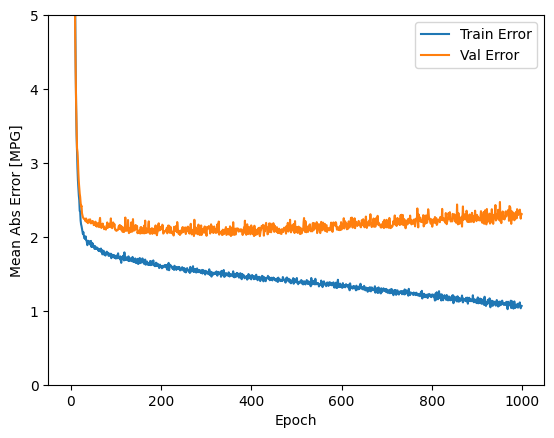

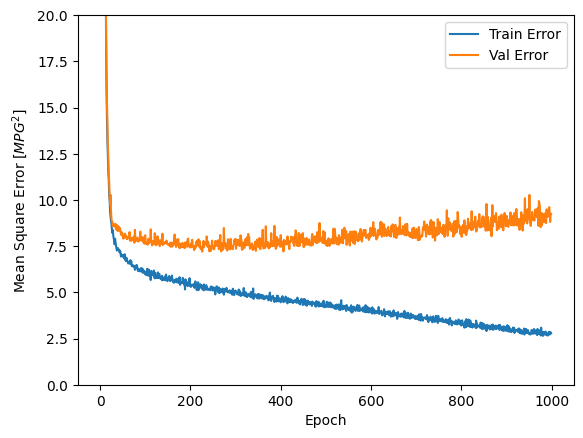

In [95]:
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'],hist['mean_absolute_error'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'],label='Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'],hist['mean_squared_error'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_squared_error'],label='Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
plot_history(history)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



...................................................

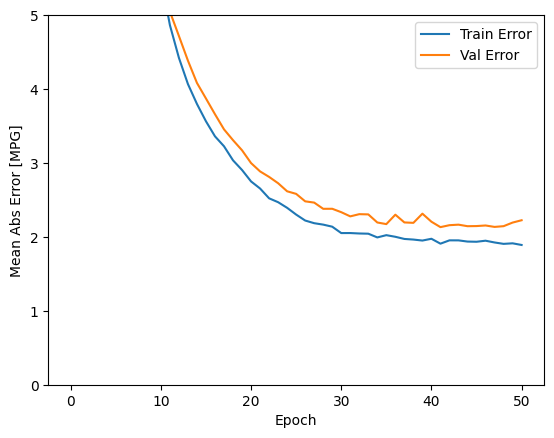

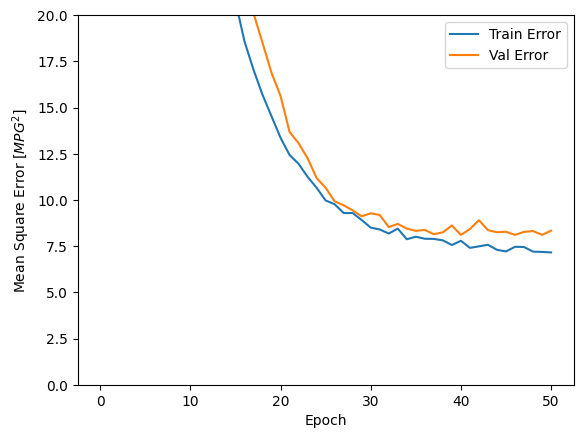

In [96]:
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(normed_train_data,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[early_stop,PrintDot()])
plot_history(history)

In [97]:
loss,mae,mse=model.evaluate(normed_test_data,test_labels,verbose=0)
print("Testing set Mean Absolute Error:{:5.2f} MPG".format(mae))

Testing set Mean Absolute Error: 1.75 MPG


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


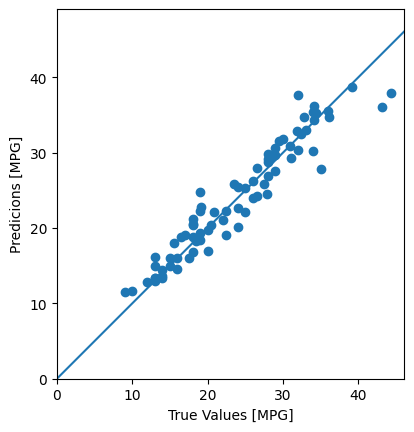

In [98]:
test_predictions=model.predict(normed_test_data).flatten()
plt.scatter(test_labels,test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predicions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

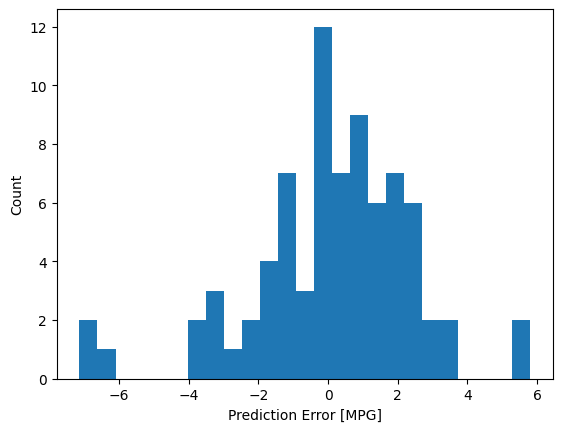

In [100]:
error=test_predictions-test_labels
plt.hist(error,bins=25)
plt.xlabel("Prediction Error [MPG]")
_=plt.ylabel("Count")

# **Decision Tree Model**

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [108]:
tree_model=DecisionTreeRegressor(random_state=42)
tree_model.fit(normed_train_data,train_labels)

DecisionTreeRegressor(random_state=42)

In [109]:
tree_example_batch=normed_train_data[:10]
tree_example_result=tree_model.predict(tree_example_batch)
tree_example_result

array([28. , 22.3, 12. , 38. , 33.8, 19.4, 38.1, 30. , 20. , 20. ])

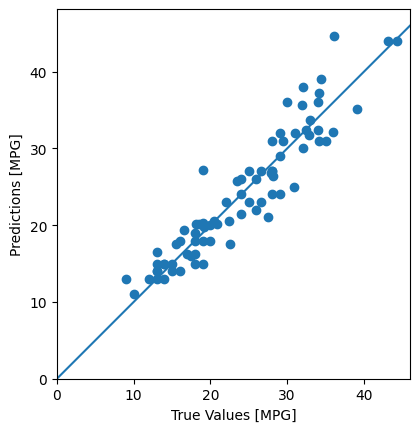

In [110]:
tree_predictions=tree_model.predict(normed_test_data).flatten()
plt.scatter(test_labels, tree_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [111]:
tree_mse=mean_squared_error(test_labels,tree_predictions)
tree_mae=mean_absolute_error(test_labels,tree_predictions)
print("Mean Absolute Error:{:.2f}".format(tree_mae))

Mean Absolute Error:2.22


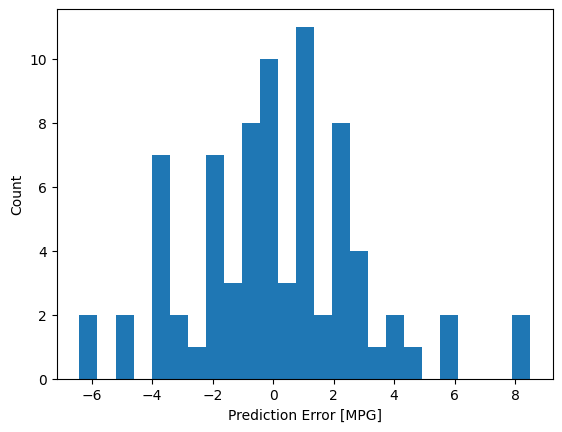

In [112]:
tree_error=tree_predictions-test_labels
plt.hist(tree_error,bins=25)
plt.xlabel("Prediction Error [MPG]")
_=plt.ylabel("Count")

In [113]:
print("Tree depth:",tree_model.tree_.max_depth)
print("Number of nodes:",tree_model.tree_.node_count)

Tree depth: 18
Number of nodes: 519


In [114]:
importances=tree_model.feature_importances_
feature_names=normed_train_data.columns
for i, importance in enumerate(importances):
  print(f"{feature_names[i]}: {importance:.4f}")

Cylinders: 0.0067
Displacement: 0.5986
Horsepower: 0.0551
Weight: 0.1605
Acceleration: 0.0259
Model Year: 0.1371
USA: 0.0015
Europe: 0.0129
Japan: 0.0016


In [115]:
tree_rules=export_text(tree_model,feature_names=list(normed_train_data.columns))
print(tree_rules)

|--- Displacement <= -0.05
|   |--- Weight <= -0.92
|   |   |--- Model Year <= 0.44
|   |   |   |--- Cylinders <= -1.16
|   |   |   |   |--- value: [18.00]
|   |   |   |--- Cylinders >  -1.16
|   |   |   |   |--- Weight <= -1.07
|   |   |   |   |   |--- Model Year <= -0.65
|   |   |   |   |   |   |--- Displacement <= -1.01
|   |   |   |   |   |   |   |--- Weight <= -1.39
|   |   |   |   |   |   |   |   |--- value: [31.00]
|   |   |   |   |   |   |   |--- Weight >  -1.39
|   |   |   |   |   |   |   |   |--- Displacement <= -1.17
|   |   |   |   |   |   |   |   |   |--- value: [29.00]
|   |   |   |   |   |   |   |   |--- Displacement >  -1.17
|   |   |   |   |   |   |   |   |   |--- value: [30.00]
|   |   |   |   |   |   |--- Displacement >  -1.01
|   |   |   |   |   |   |   |--- Acceleration <= 1.50
|   |   |   |   |   |   |   |   |--- value: [27.00]
|   |   |   |   |   |   |   |--- Acceleration >  1.50
|   |   |   |   |   |   |   |   |--- value: [26.00]
|   |   |   |   |   |--- Model Y

# **Support Vector Regression Model**

In [116]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [117]:
svr_model=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=.1)
svr_model.fit(normed_train_data,train_labels)

SVR(C=100, gamma=0.1)

In [118]:
svr_example_batch=normed_train_data[:10]
svr_example_result=svr_model.predict(svr_example_batch)
svr_example_result

array([27.90033192, 24.97138375, 13.0760723 , 37.03320837, 34.82038825,
       19.88624285, 36.67338172, 30.44096346, 19.89980701, 25.54131232])

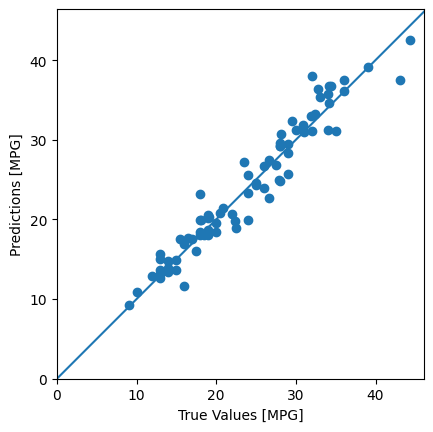

In [119]:
svr_predictions=svr_model.predict(normed_test_data).flatten()
plt.scatter(test_labels, svr_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [120]:
svr_mse=mean_squared_error(test_labels,svr_predictions)
svr_mae=mean_absolute_error(test_labels,svr_predictions)
print("Mean Absolute Erorr:{:.2f}".format(svr_mae))

Mean Absolute Erorr:1.61


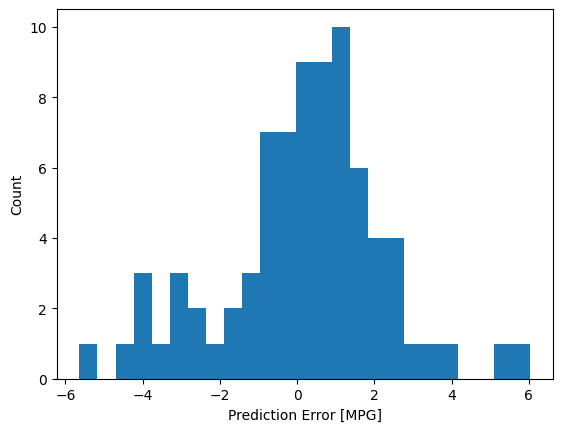

In [121]:
svr_error = svr_predictions - test_labels
plt.hist(svr_error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")